# Pre-Lab ELN

### Name: Osagie Aimiuwu


### Date: November 8, 2021


### PID: 730393691


### Jupyter Notebook Number: 5

## Purpose/Objective:
1. Define functions for creating various figures given one or more classifying lists as inputs.

### Installing AllenSDK into your local environment. 

In [1]:
pip install --user allensdk #must restart kernal after installing for next cell to work

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for glymur: filename=Glymur-0.8.19-py3-none-any.whl size=2721998 sha256=cbb4ab3a8a8c56097bbf5bb899a5a5caa8f9b39ffc2138c9c36297f492601824
  Stored in directory: c:\users\osagiek\appdata\local\pip\cache\wheels\1c\a8\3a\1908c55c201be1ecc5c1347fec8d27896c01d589f3e64eb0e4
  Created wheel for argschema: filename=argschema-3.0.1-py2.py3-none-any.whl size=19074 sha256=8735ccf16bb83a835d98b7676d19e7623e3d2c19897718e42429995f3c049fcc
  Stored in directory: c:\users\osagiek\appdata\local\pip\cache\wheels\37\12\1e\e60941e03b7ce2d470785df5f51db1cef82f09589c531efaf1
Successfully built glymur argschema
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 

### Starting Code:

In [1]:
import os
import shutil
import allensdk #add to template
import pprint

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline

# You may have to change the following code depending on whether you are working with EcephysProjectCache or BrainObservatoryCache. 
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

In [2]:
data_directory = 'allen_files' 

manifest_path = os.path.join(data_directory, "manifest.json")
boc = BrainObservatoryCache(manifest_file = manifest_path)

In [3]:
#update
loud_scenes = [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 22, 23, 27, 29, 32, 34, 36, 38, 39, 44, 45, 46, 47,
               50, 53, 56, 57, 79]
quiet_scenes = [3, 18, 19, 20, 21, 24, 25, 26, 28, 30, 31, 33, 35, 37, 40, 41, 42, 43, 48, 49, 51, 52, 54, 55, 58, 59, 60,
                61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88,
                89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
                113, 114, 115, 116, 117]

male_ec_ids = [511510822, 662351162, 593506466, 598584901, 511507650, 603425700, 660492886, 662172425, 614418789, 511510940, 660064794, 595906107, 571541563, 566759225, 583787531, 603519606, 563364151, 701412138, 511510955, 511510794, 570278595, 656939125, 511511001, 609479771, 604328040, 616886391, 657804822, 679702882, 612543997, 580095653, 682049097, 511510797, 526481129, 511510860, 575772104, 650079242, 575892535, 669859917, 606802465, 686449090, 603502696, 556899621, 686031104, 650389951, 614571624, 638056632, 663488406, 637669268, 710327593, 511510736, 511510718, 686442554, 714778444, 536323956, 511510855, 577720109, 657650108, 637998953, 511510817, 564425775, 642651896, 643592301, 564791561, 653122665, 671618885, 582925971, 647595663, 582867145, 570428250, 593508592, 651366508, 662974313, 670721587, 527676429, 575710989, 650389885, 560809200, 659767480, 511510699, 575771818, 538803515, 573261513, 546085409, 575827179, 511510627, 669859473, 612549083, 517328083, 657391035, 670721865, 583136565, 689402243, 688678764, 511510870, 586351979, 595263152, 627823571, 550127305, 568461662, 601790879, 588196040, 669237513, 658518484, 612536909, 576714442, 558471484, 673477065, 572606380, 545578995, 639929073, 612044633, 603763385, 511510688, 573864648, 571039045, 511507811, 657082052, 685816004, 590168381, 556639822, 566307034, 660510591, 657016265, 710502979, 603425657, 658854535, 584778281, 604576635, 674802081, 582621871, 560876149, 649401934, 685063218, 554219902, 511511006, 565216521, 547315012, 648377366, 552760668, 549855418, 511510675, 604866830, 661732156, 554037268, 511510670, 657785848, 658534530, 511510645, 598564171, 652842570, 652736297, 511510989, 710469197, 539291370, 701046698, 595718340, 543677425, 665722299, 658816711, 605883131, 511499656, 569645688, 601498409, 511511083, 558476280, 595273801, 653551963, 661437138, 511854338, 591460068, 660491622, 574034739, 560782654, 529487170, 555700037, 570008442, 581676514, 553568029, 602397921, 696156781, 511510753, 584155531, 599112785, 603452149, 592655325, 593438035, 639117194, 540993888, 646959386, 511510723, 511510998, 511510893, 551888517, 571684731, 604889966, 570994450, 564791547, 660492024, 559645337, 657470854, 595806298, 701048110, 595620996, 601841435, 535575493, 599920955, 596557967, 579992884, 673475018, 556665479, 649324896, 606960910, 657391623, 650885966, 511510650, 607426688, 603576130, 653125128, 612555401, 511510779, 551657958, 702934962, 640210564, 566458503, 593270600, 604529228, 569792815, 667692761, 602616431, 540168835, 511510640, 638753614, 511510695, 686441797, 511856567, 645413757, 703308069, 638870774, 699155263, 617395453, 546328009, 610222464, 666589599, 627823721, 557986062, 571137444, 698102441, 666271537, 577379200, 606130900, 643667453, 595337948, 598635819, 639253041, 560821337, 647598517, 560578597, 511510715, 580043437, 586452279, 556936291, 576411244]
female_exp_ids = [662358769, 569287964, 511500480, 686912320, 716655272, 617047314, 670395723, 627823692, 511509529, 665726616, 644947714, 573720506, 574529963, 591430488, 566480479, 580163815, 657389970, 557520762, 680156909, 575766605, 650390040, 645690244, 555327033, 531134088, 555042465, 511510658, 682734790, 602589529, 511511015, 564791582, 511510917, 546724786, 511511011, 555749366, 672223113, 562536151, 652842493, 559792042, 593902385, 665413463, 657009579, 653123584, 638262555, 584829664, 511510763, 657775945, 565039910, 511511089, 606872639, 511510896, 560753319, 639251930, 601547953, 708949511, 658536326, 511510994, 640198007, 644061873, 556936862, 511510710, 707923643, 676503586, 511510667, 659752540, 601812178, 569611977, 511511052, 674679297, 617381603, 660065749, 511976252, 627823633, 637671552, 659491615, 653932503, 657014785, 591392164, 653126875, 614561352, 524691282, 670396939, 702208910, 650389905, 511510748, 601374504, 617388115, 603316204, 667772494, 551412603, 676024664, 658854759, 511511029, 650510286, 528792730, 573378109, 658536109, 672207945, 652094915, 609198028, 561463418, 560821491, 646686776, 647155120, 580051757, 572376866, 591548031, 637126539, 512124562, 569981238, 686449283, 662219850, 652096181, 659746623, 662361094, 582804903, 561472631, 561312433, 547561986, 644909309, 671164925, 511510867, 569718095, 652091262, 589253442, 646016202, 593337825, 642278280, 652092000, 511510664, 696503438, 661744802, 592349242, 601259497, 673144414, 588503721, 657078117, 576208803, 669239850, 679700455, 584944063, 588191924, 601273919, 530739574, 511510836, 657390169, 627823202, 637113170, 560722730, 646959440, 712178509, 651773425, 575302106, 698260530, 702956471, 555040113, 673914979, 676503916, 658020689, 614556104, 601805377, 511510848, 657776354, 569396922, 572607996, 626027942, 528889127, 529763300, 657472844, 616779891, 581026086, 644013840, 554014018, 637115672, 680150731, 597028936, 601871316, 511498742, 584475415, 652092674, 685816034, 603452289, 569251675, 643061996, 712178481, 657224239, 511510945, 511510911, 623587004, 583279801, 689385402, 710504561, 575940387, 643590699, 669876048]

### Creating functions


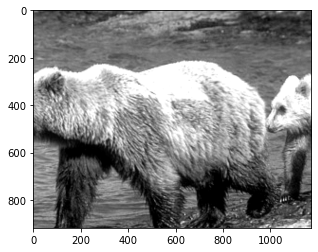

In [15]:
def print_scene(scene_number: int) -> None:
    """Takes in a number from 0 to 117 and displays the corresponding scene image."""
    experiment_container_id = 660492886
    session_id = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id], stimuli=['natural_scenes'])[0]['id']
    data_set = boc.get_ophys_experiment_data(session_id)
    natural_scene_template = data_set.get_stimulus_template('natural_scenes')
    plt.imshow(natural_scene_template[scene_number,:,:], cmap='gray')
    
print_scene(0)

In [28]:
# Downloading all cells that had a peak dff value
cells = boc.get_cell_specimens()
cells = pd.DataFrame.from_records(cells)
scene_cells = cells[ cells['peak_dff_ns'] == cells['peak_dff_ns'] ]

In [48]:
def find_scene_in_list(scenes_list) -> int:
    """Looks through scene_cells dataframe and returns index of first cell whose 
    preferred image is in the scenes_list parameter."""
    for i in range(len(scene_cells.index)):
        if scene_cells["pref_image_ns"].iloc[i] in scenes_list:
            return int(scene_cells["pref_image_ns"].iloc[i])
    return -1

print(find_scene_in_list(loud_scenes))
pprint.pprint(scene_cells["pref_image_ns"])

2
6         95.0
7        110.0
8          2.0
9         97.0
10        50.0
         ...  
63240     28.0
63242      5.0
63245    103.0
63246     48.0
63250     19.0
Name: pref_image_ns, Length: 40064, dtype: float64


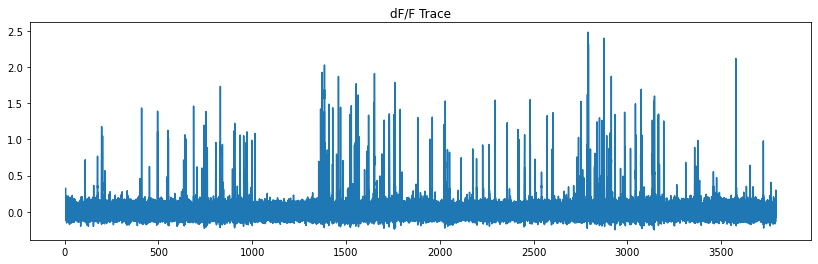

In [25]:
def plot_dff(index: int, title: str) -> None:
    """Plots a dff traces graph for scene_cell and specified index."""
    scene_cell = scene_cells.iloc[index]
    cell_exp = boc.get_ophys_experiments(cell_specimen_ids=[scene_cell['cell_specimen_id']],
                                         stimuli=['natural_scenes'])[0]
    data_set = boc.get_ophys_experiment_data(cell_exp['id'])
    
    time, dff_traces = data_set.get_dff_traces(cell_specimen_ids=[scene_cell['cell_specimen_id']])

    plt.figure(figsize=(14,4))
    plt.title(title)
    plt.plot(time[:len(dff_traces[0])], dff_traces[0])
    plt.show()

plot_dff(0, "dF/F Trace")

In [38]:
def count_cells(area: str, scenes_list) -> int:
    """Counts the number of male and female cells in a specific brain layer whose 
    preferred scene is in the scenes_list parameter."""
    area_cells = scene_cells[ scene_cells["area"] == area ]
    count = [0,0] # index 0 is male, index 1 is female
    
    for i in range(len(area_cells.index)):
        if area_cells["pref_image_ns"].iloc[i] in scenes_list:
            if area_cells["experiment_container_id"].iloc[i] in male_ec_ids:
                count[0] += 1
            else:
                count[1] += 1
    return count

count_cells("VISal", quiet_scenes)

[1974, 945]

### Creating figures for 11/8

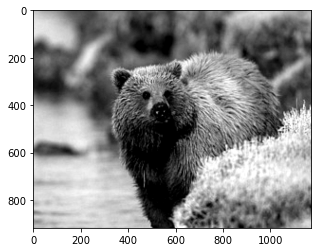

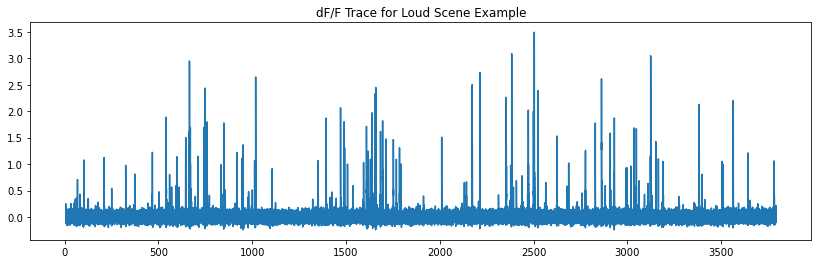

In [50]:
loud_num = find_scene_in_list(loud_scenes)

print_scene(loud_num)

plot_dff(loud_num, "dF/F Trace for Loud Scene Example")

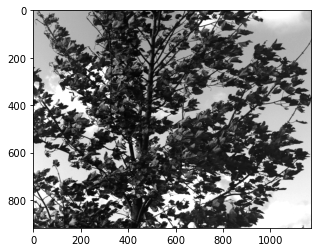

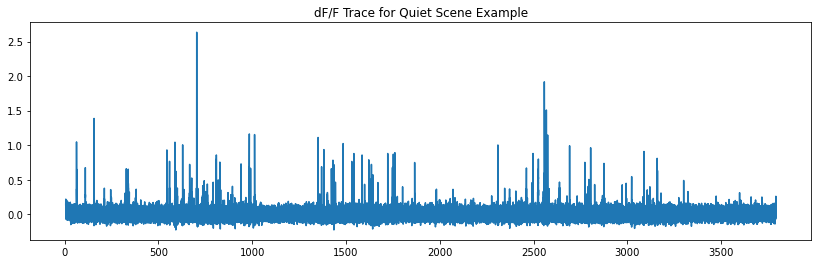

In [51]:
quiet_num = find_scene_in_list(quiet_scenes)

print_scene(quiet_num)

plot_dff(quiet_num, "dF/F Trace for Quiet Scene Example")